In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 
import numpy as np

In [56]:
tickers = ['AAPL', 'MSFT', 'AMZN']
stocks=yf.download(tickers, start='2010-01-01', end = '2020-11-26')

[*********************100%***********************]  3 of 3 completed


In [57]:
stocks.isnull().sum()

Adj Close  AAPL    0
           AMZN    0
           MSFT    0
Close      AAPL    0
           AMZN    0
           MSFT    0
High       AAPL    0
           AMZN    0
           MSFT    0
Low        AAPL    0
           AMZN    0
           MSFT    0
Open       AAPL    0
           AMZN    0
           MSFT    0
Volume     AAPL    0
           AMZN    0
           MSFT    0
dtype: int64

In [86]:
data = stocks.loc[:, 'Close'].copy()

In [87]:
data 

,AAPL,AMZN,MSFT
Date,,,
2010-01-04,7.643214,6.695000,30.950001
2010-01-05,7.656429,6.734500,30.959999
2010-01-06,7.534643,6.612500,30.770000
2010-01-07,7.520714,6.500000,30.450001
2010-01-08,7.570714,6.676000,30.660000
...,...,...,...
2020-11-19,118.639999,155.850998,212.419998
2020-11-20,117.339996,154.970001,210.389999
2020-11-23,113.849998,154.919495,210.110001


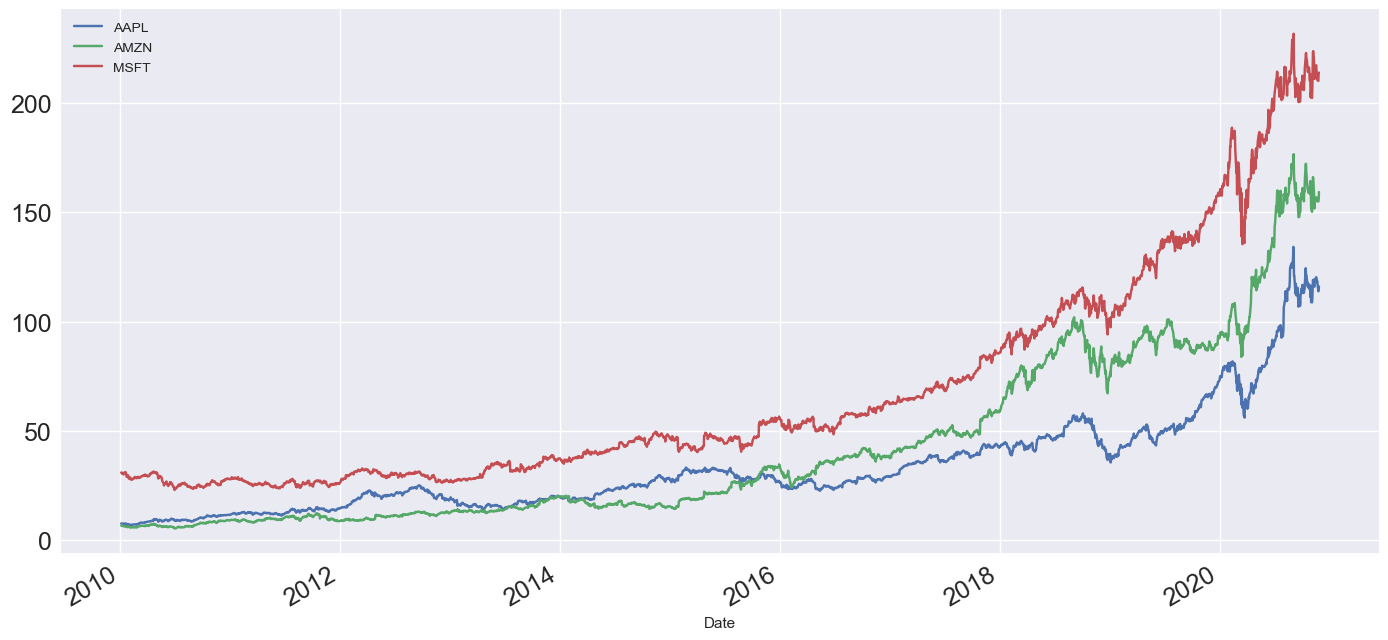

In [60]:
data.plot(figsize= (17, 8), fontsize=18)
plt.style.use('seaborn')
plt.show()

In [61]:
data.head()

,AAPL,AMZN,MSFT
Date,,,
2010-01-04,7.643214,6.6950,30.950001
2010-01-05,7.656429,6.7345,30.959999
2010-01-06,7.534643,6.6125,30.770000
2010-01-07,7.520714,6.5000,30.450001
2010-01-08,7.570714,6.6760,30.660000


## As the starting price are different, there is huge difference in this graph. So, we want to normalize the data to see the perofmance only. 

In [62]:
data.iloc[0]

AAPL     7.643214
AMZN     6.695000
MSFT    30.950001
Name: 2010-01-04 00:00:00, dtype: float64

In [63]:
# Normalisation of data 
data.div(data.iloc[0])


,AAPL,AMZN,MSFT
Date,,,
2010-01-04,1.000000,1.000000,1.000000
2010-01-05,1.001729,1.005900,1.000323
2010-01-06,0.985795,0.987677,0.994184
2010-01-07,0.983973,0.970874,0.983845
2010-01-08,0.990514,0.997162,0.990630
...,...,...,...
2020-11-19,15.522265,23.278715,6.863328
2020-11-20,15.352179,23.147124,6.797738
2020-11-23,14.895566,23.139580,6.788691


## By normalizing the data, we can really see the performance of each stock comparing to the first price tag they had. It allows us to see when they started to rise or lost their value relative to the intitial price.

In [64]:
normdata=data.div(data.iloc[0]).mul(100)
normdata

# better to normalize the data by 100

,AAPL,AMZN,MSFT
Date,,,
2010-01-04,100.000000,100.000000,100.000000
2010-01-05,100.172893,100.589989,100.032305
2010-01-06,98.579511,98.767737,99.418416
2010-01-07,98.397266,97.087376,98.384491
2010-01-08,99.051443,99.716205,99.063002
...,...,...,...
2020-11-19,1552.226536,2327.871455,686.332772
2020-11-20,1535.217945,2314.712431,679.773810
2020-11-23,1489.556554,2313.958038,678.869129


## Now, we have data where every company started at the same point, and we can see how they performed. It's makes easier to compare the performance of these stocks

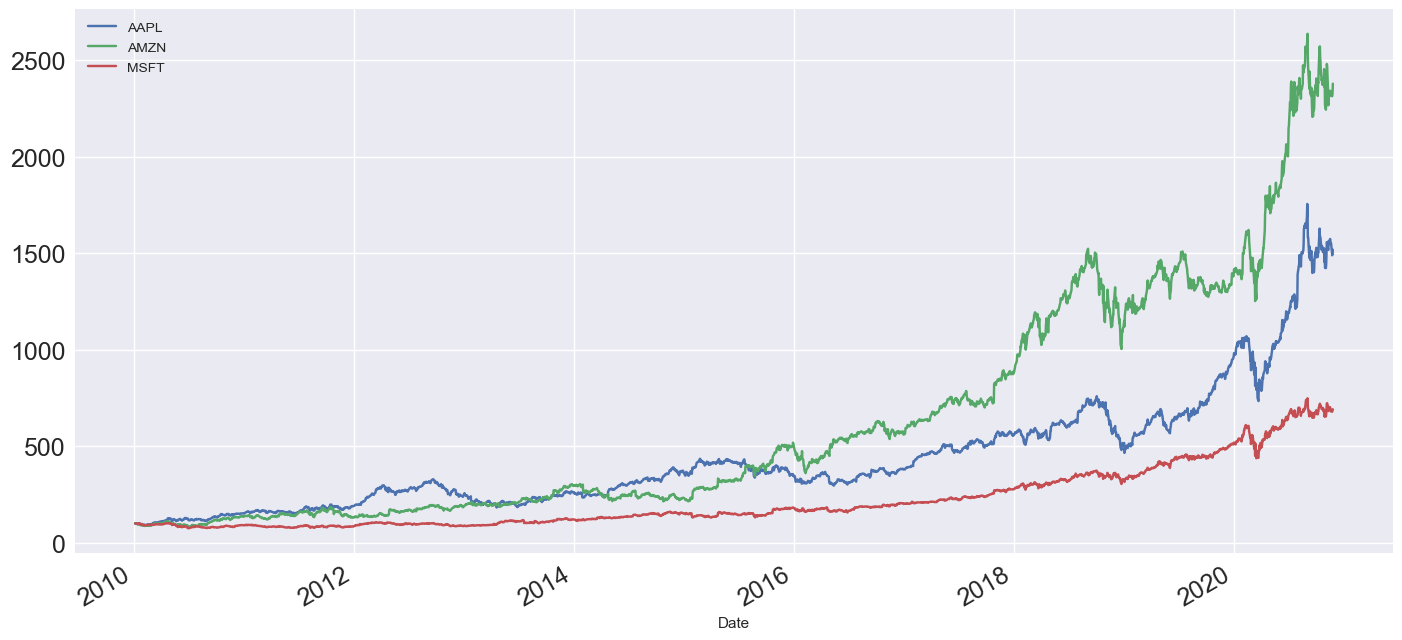

In [65]:
normdata.plot(figsize = (17, 8), fontsize=18)
plt.style.use('seaborn')
plt.show()


## The graph at the above gives better understanding of how the stocks performed. From the first chart it looks like Apple stock is performing not well comparig to Amazon and Microsoft stocks. But actually after normalizing the data we can see the real performance of each stock. And Apple actually performed better than Microsoft during this period. And Amazon showed the best performance than other stocks. If we didn't normalize the data, we would assume from the first chart that Microsoft stock performed better comparing to others stocks just because of the price, but after normalizing, we see the real performance of each stock in terms of their gains. Even though the price for Microsoft stock was higher, but Apple and Amazon did had higher growth in terms of price.

In [73]:
data

,AAPL,AMZN,MSFT
Date,,,
2010-01-04,7.643214,6.695000,30.950001
2010-01-05,7.656429,6.734500,30.959999
2010-01-06,7.534643,6.612500,30.770000
2010-01-07,7.520714,6.500000,30.450001
2010-01-08,7.570714,6.676000,30.660000
...,...,...,...
2020-11-19,118.639999,155.850998,212.419998
2020-11-20,117.339996,154.970001,210.389999
2020-11-23,113.849998,154.919495,210.110001


## Comparison of return and risk of these stocks based on standard deviation and mean of the stock prices. 

In [66]:
data.pct_change()

,AAPL,AMZN,MSFT
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.001729,0.005900,0.000323
2010-01-06,-0.015906,-0.018116,-0.006137
2010-01-07,-0.001849,-0.017013,-0.010400
2010-01-08,0.006648,0.027077,0.006897
...,...,...,...
2020-11-19,0.005168,0.003722,0.006348
2020-11-20,-0.010958,-0.005653,-0.009557
2020-11-23,-0.029743,-0.000326,-0.001331


In [70]:
com=data.pct_change().dropna()


In [89]:
com.describe()
# to get the mean and standard deviation 

,AAPL,AMZN,MSFT
count,2744.000000,2744.000000,2744.000000
mean,0.001151,0.001356,0.000834
std,0.017844,0.020049,0.016056
min,-0.128647,-0.126568,-0.147390
25%,-0.007131,-0.008331,-0.006967
50%,0.000899,0.001103,0.000664
75%,0.010356,0.011699,0.008642
max,0.119808,0.157457,0.142169


## Isolating standard deviation and mean from the summary data 

In [72]:
sum = com.describe().T.loc[:, ['mean', 'std']]
sum

,mean,std
AAPL,0.001151,0.017844
AMZN,0.001356,0.020049
MSFT,0.000834,0.016056


In [90]:
sum['mean'] = sum['mean']*252
sum['std']=sum['std']* np.sqrt(252)
sum
# mean and standard deviation for a whole year

,mean,std
AAPL,73.102273,4.496773
AMZN,86.086633,5.052324
MSFT,52.935659,4.046175


## By multiplying the values by 252 (trading days per year), we have computed standard deviation and mean based on a whole trading year compared to the standard deviation and mean based on each trading day.

Text(0, 0.5, 'Return')

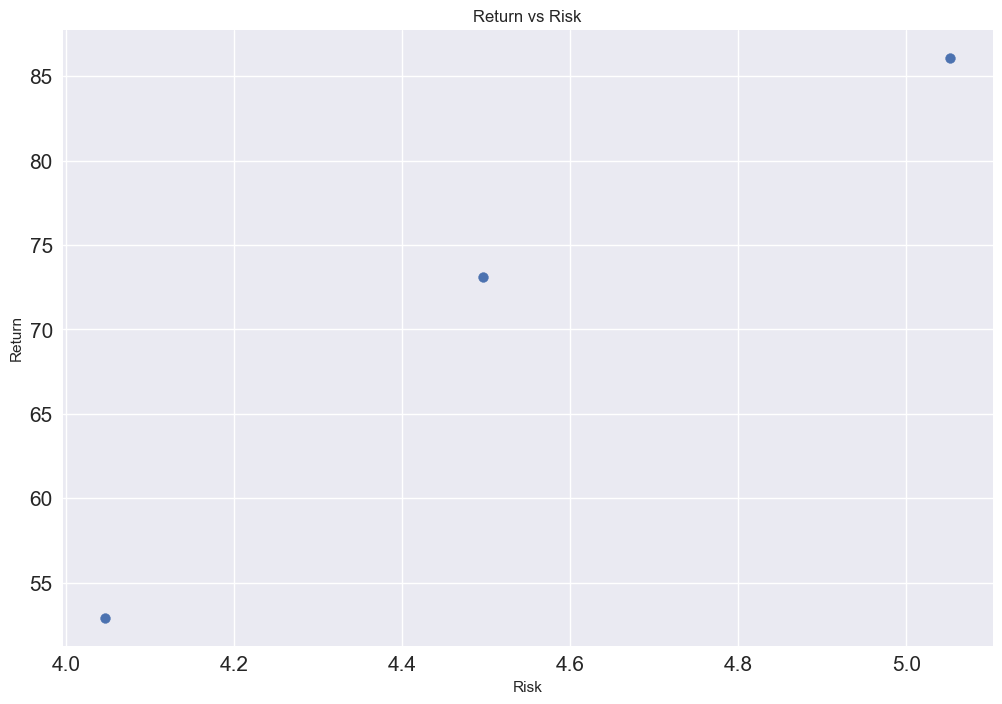

In [91]:
sum.plot.scatter(x='std', y='mean', figsize = (12, 8), s=50, fontsize=15)
plt.title('Return vs Risk')
plt.xlabel('Risk')
plt.ylabel('Return')

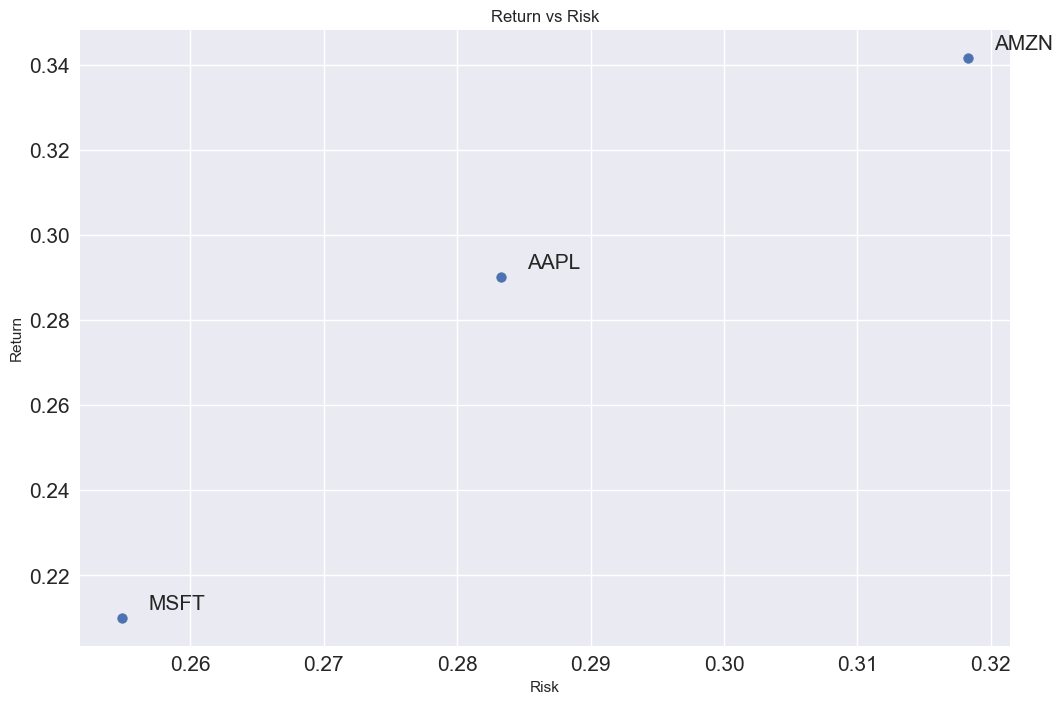

In [85]:
sum.plot.scatter(x='std', y='mean', figsize = (12, 8), s=50, fontsize=15)
plt.title('Return vs Risk')
plt.xlabel('Risk')
plt.ylabel('Return')
for i in sum.index:
    plt.annotate(i, xy=(sum.loc[i, 'std']+0.002, sum.loc[i, 'mean']+0.002), size=15)

## By adding annotation we are annotating each dot with their i value and we are simply justifying here at the place on the graph they are going to be based on the dot. These are just to make us to understand which dot belongs to which stock. 0,002 means how far away the annotation should be from the dots and the size.  

## In summary, it is evident that Amazon stock carries higher risk compared to others, but it also offers the highest return. Microsoft stock, on the other hand, exhibits the lowest return as well as the lowest risk. For risk-averse investors, Microsoft stock may be a suitable choice. Among these stock selections, Apple stock falls in the medium risk and return category, with an average return and average risk compared to other stocks. Additionally, by comparing this graph data to the normalized data graph, we can gain a better understanding of the best-performing stock relative to its risk, which is reflected in the volatility of its price and its actual performance.